In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
sns.set_style('whitegrid')

plt.rc('figure', autolayout=True)
plt.rc('axes', labelweight='bold', labelsize='large',
       titleweight='bold', titlesize=18, titlepad=10)
plt.rc('animation', html='html5')

import warnings
warnings.filterwarnings('ignore')

In [4]:
path = 'E:\\Elavate lab\\Task 5\\train.csv'
data = pd.read_csv(path)
df = pd.DataFrame(data)

In [5]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [7]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

### EDA

In [8]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [9]:
for feature in df.columns:
    counts = df[feature].value_counts()
    print(f"Value counts of {feature} \n{counts}\n")

Value counts of PassengerId 
PassengerId
1      1
599    1
588    1
589    1
590    1
      ..
301    1
302    1
303    1
304    1
891    1
Name: count, Length: 891, dtype: int64

Value counts of Survived 
Survived
0    549
1    342
Name: count, dtype: int64

Value counts of Pclass 
Pclass
3    491
1    216
2    184
Name: count, dtype: int64

Value counts of Name 
Name
Braund, Mr. Owen Harris                     1
Boulos, Mr. Hanna                           1
Frolicher-Stehli, Mr. Maxmillian            1
Gilinski, Mr. Eliezer                       1
Murdlin, Mr. Joseph                         1
                                           ..
Kelly, Miss. Anna Katherine "Annie Kate"    1
McCoy, Mr. Bernard                          1
Johnson, Mr. William Cahoone Jr             1
Keane, Miss. Nora A                         1
Dooley, Mr. Patrick                         1
Name: count, Length: 891, dtype: int64

Value counts of Sex 
Sex
male      577
female    314
Name: count, dtype: int64

Va

In [10]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

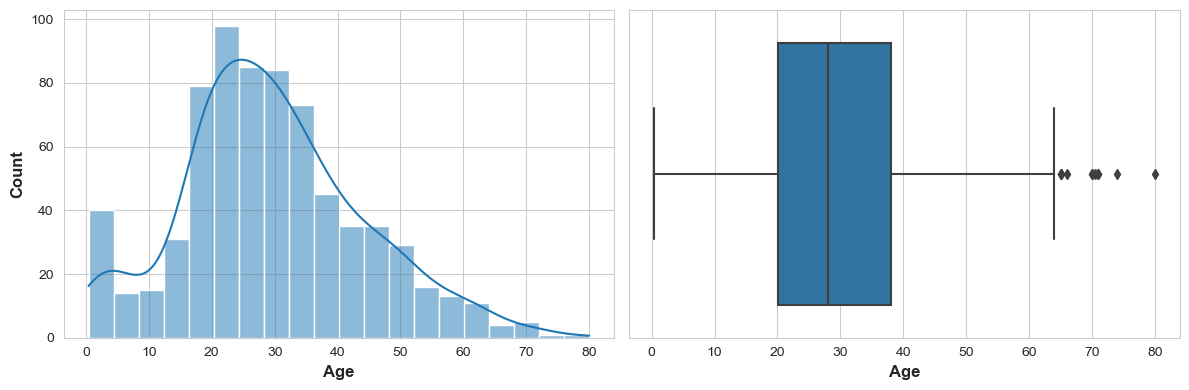

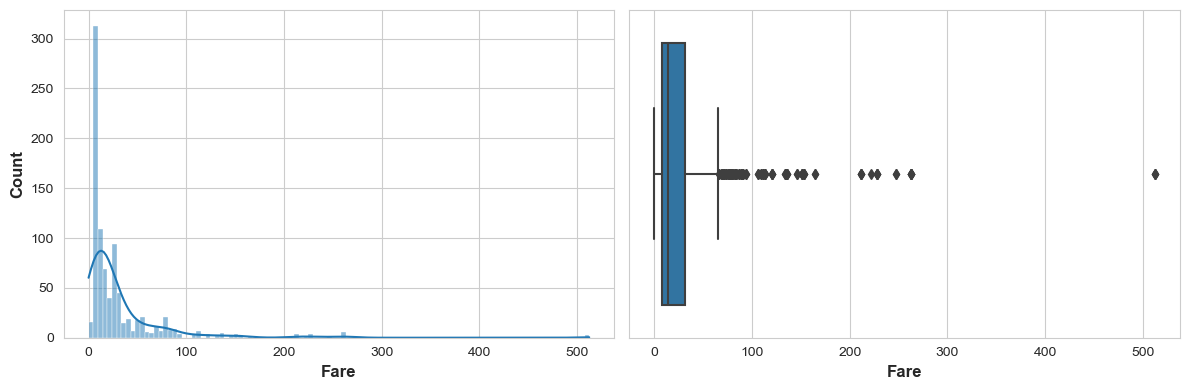

In [11]:
numeric_columns = ['Age','Fare']


for col in numeric_columns:
    plt.figure(figsize=(12, 4))
    plt.subplot(1, 2, 1)
    sns.histplot(df[col], kde=True)
    plt.subplot(1, 2, 2)
    sns.boxplot(x=df[col])
    plt.tight_layout()
    plt.show()

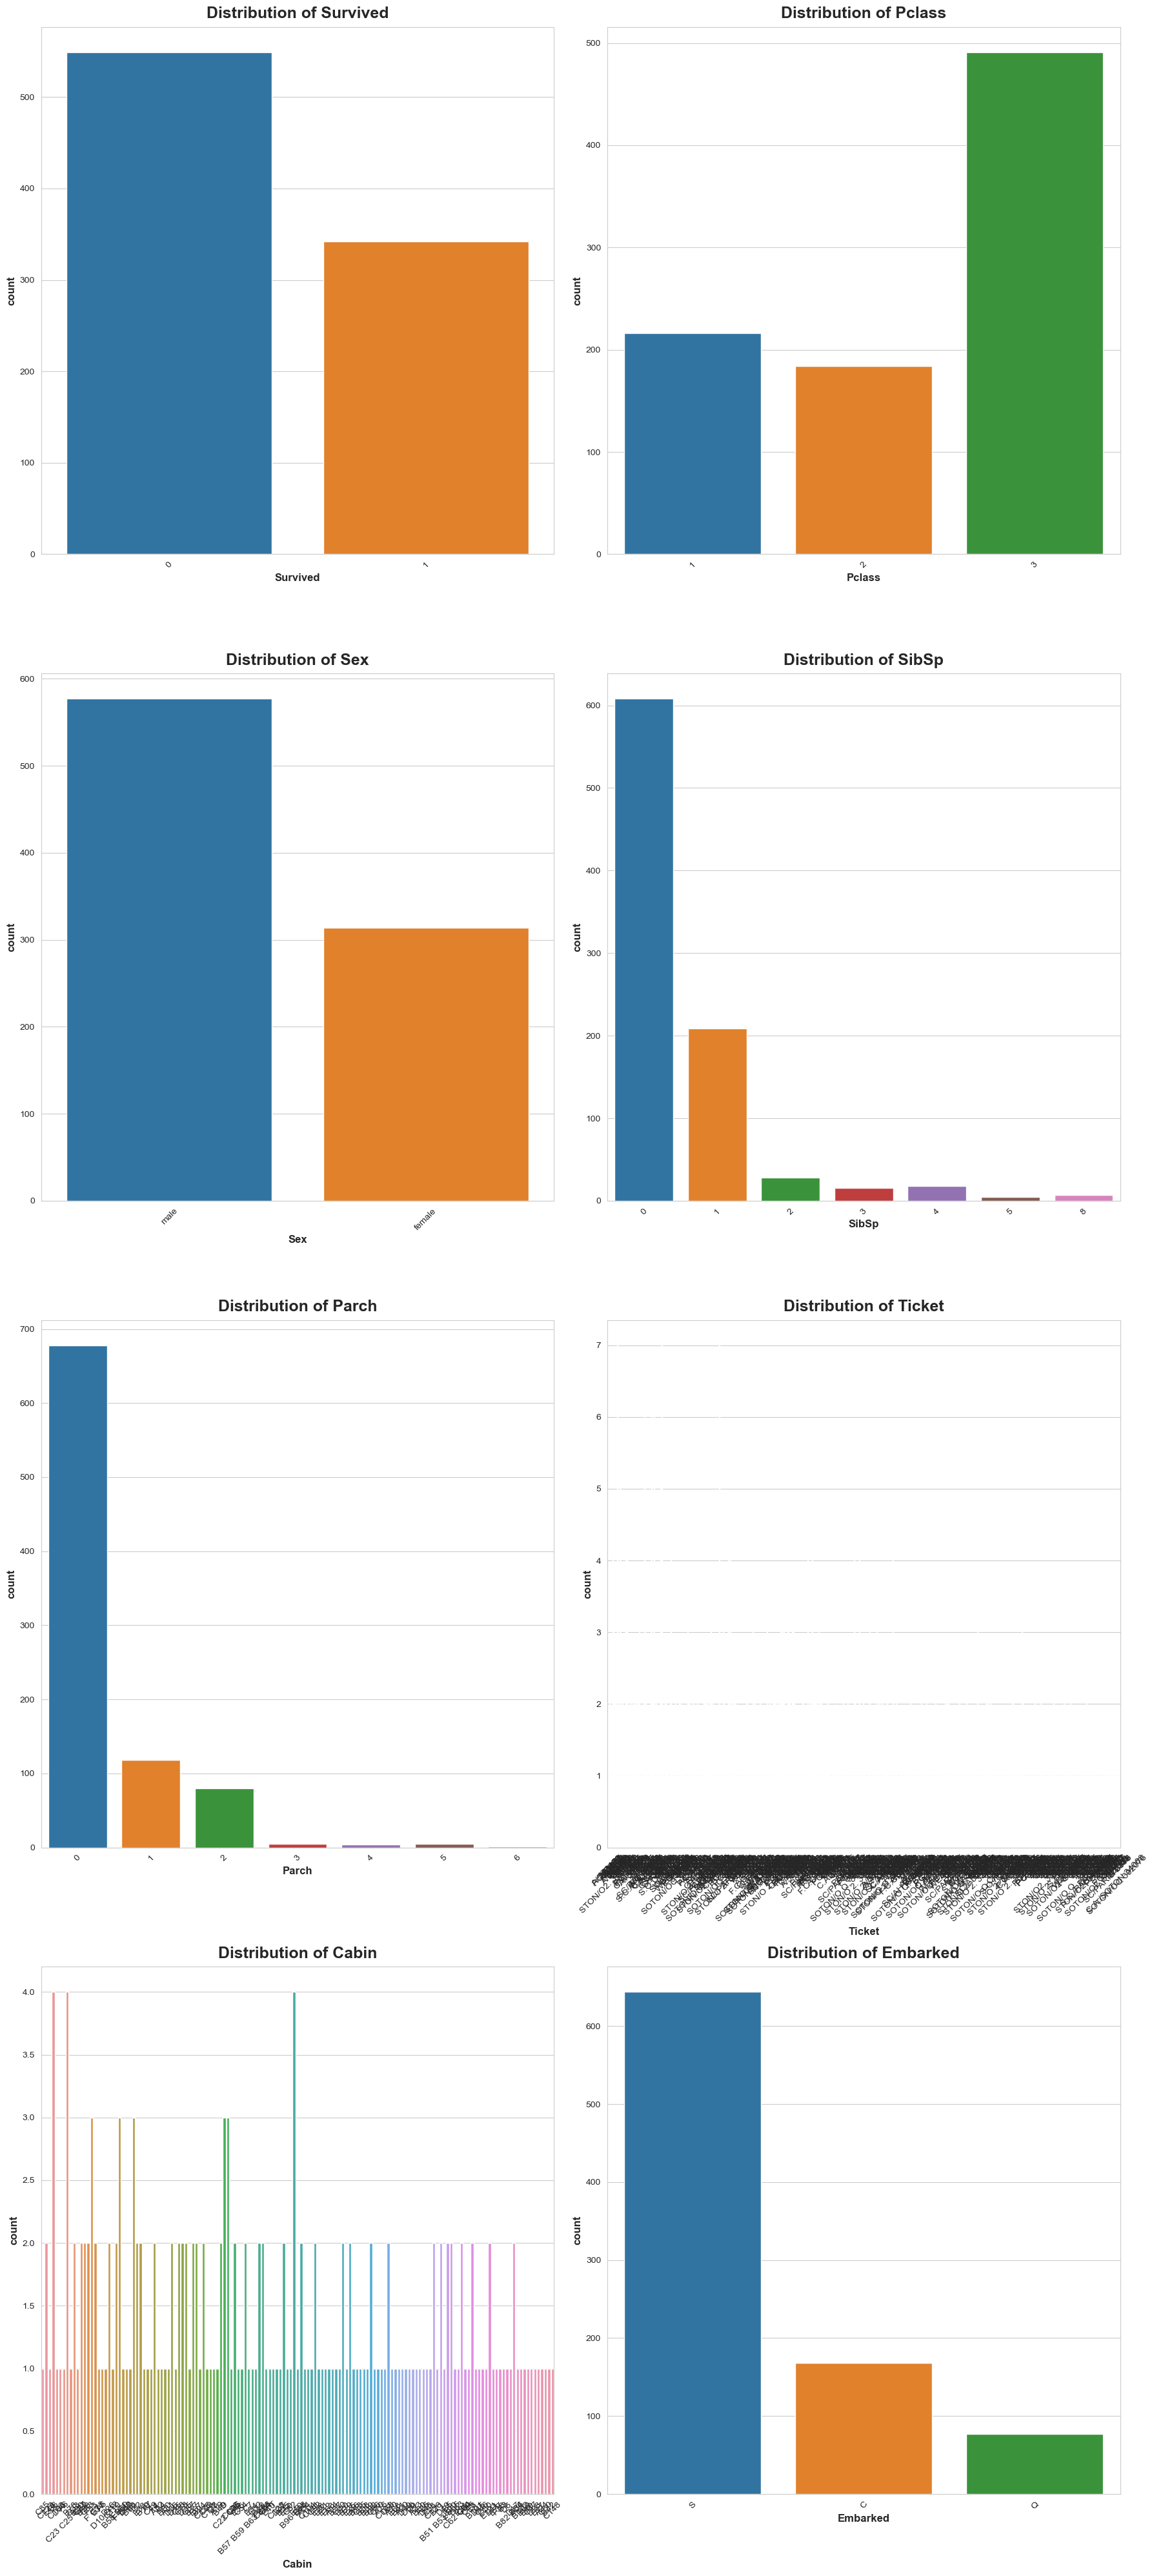

In [12]:
categorical_column = ['Survived','Pclass','Sex','SibSp','Parch','Ticket','Cabin','Embarked']

plt.figure(figsize=(18, 40))
for i, column in enumerate(categorical_column, 1):
    plt.subplot(4, 2, i)
    sns.countplot(x=column, data=df)
    plt.title(f'Distribution of {column}')
    plt.xticks(rotation=45)  # Optional: Rotates x-axis labels for better readability
plt.tight_layout()
plt.show()

#### Survived contains 0 and 1, this represents the passenger survived or not. 0 = No  1 = Yes mojority passengers hasn't survived.
#### Pclass is passeenger class most of passeengers has use third class.
#### Age distribution is left skewed.
#### SibSp represents the number of siblings for passengers. Majority of passengers hasn't siblings but passengers has siblings upto 8.
#### Parch column contains the number of of parents / children aboard. Most of passsengers hasn't parent or children in the ship.
#### Fare has left skewed distribution.

## Distribution of Fare with Gender

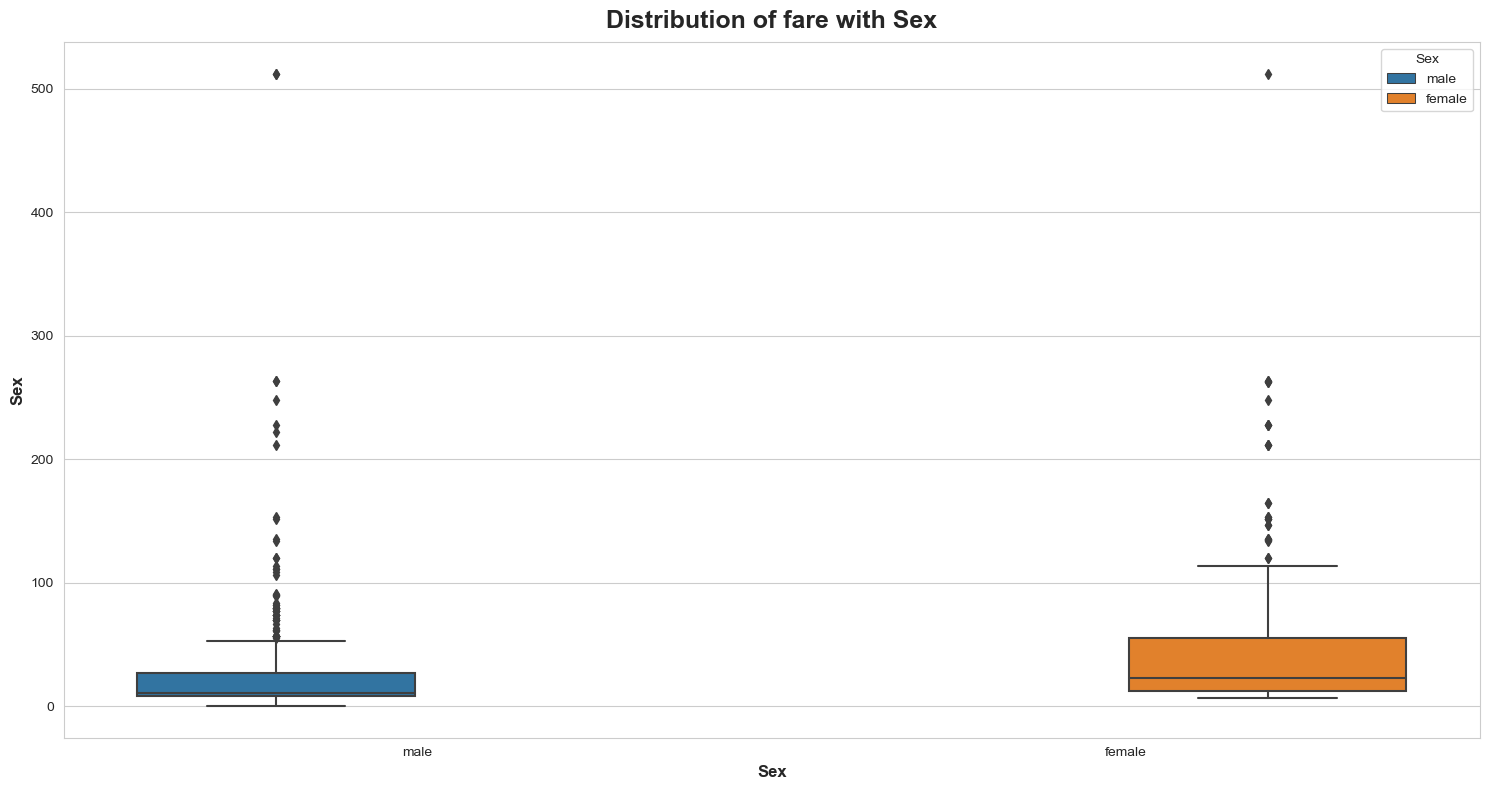

In [13]:
plt.figure(figsize=(15, 8))
sns.boxplot(x = 'Sex' , y='Fare',data = df, hue = 'Sex')
plt.ylabel("Sex")
plt.title('Distribution of fare with Sex')
plt.show()

#### The IQR for amount for female is higher than males.

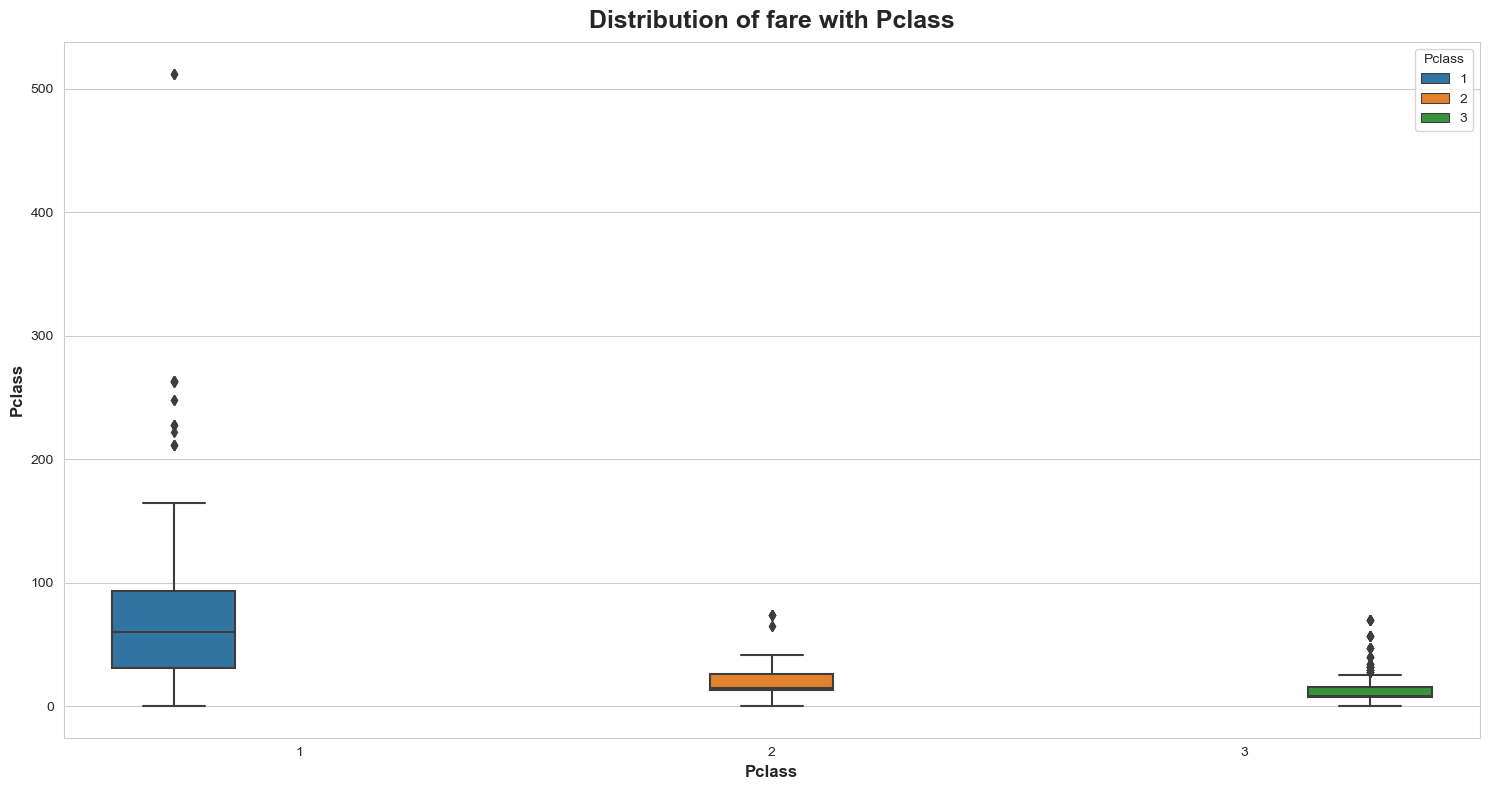

In [14]:
plt.figure(figsize=(15, 8))
sns.boxplot(x = 'Pclass' , y='Fare',data = df, hue = 'Pclass')
plt.ylabel("Pclass")
plt.title('Distribution of fare with Pclass')
plt.show()

#### The high IQR of fare has spent for 1st class passengers.lowest from 3rd class.

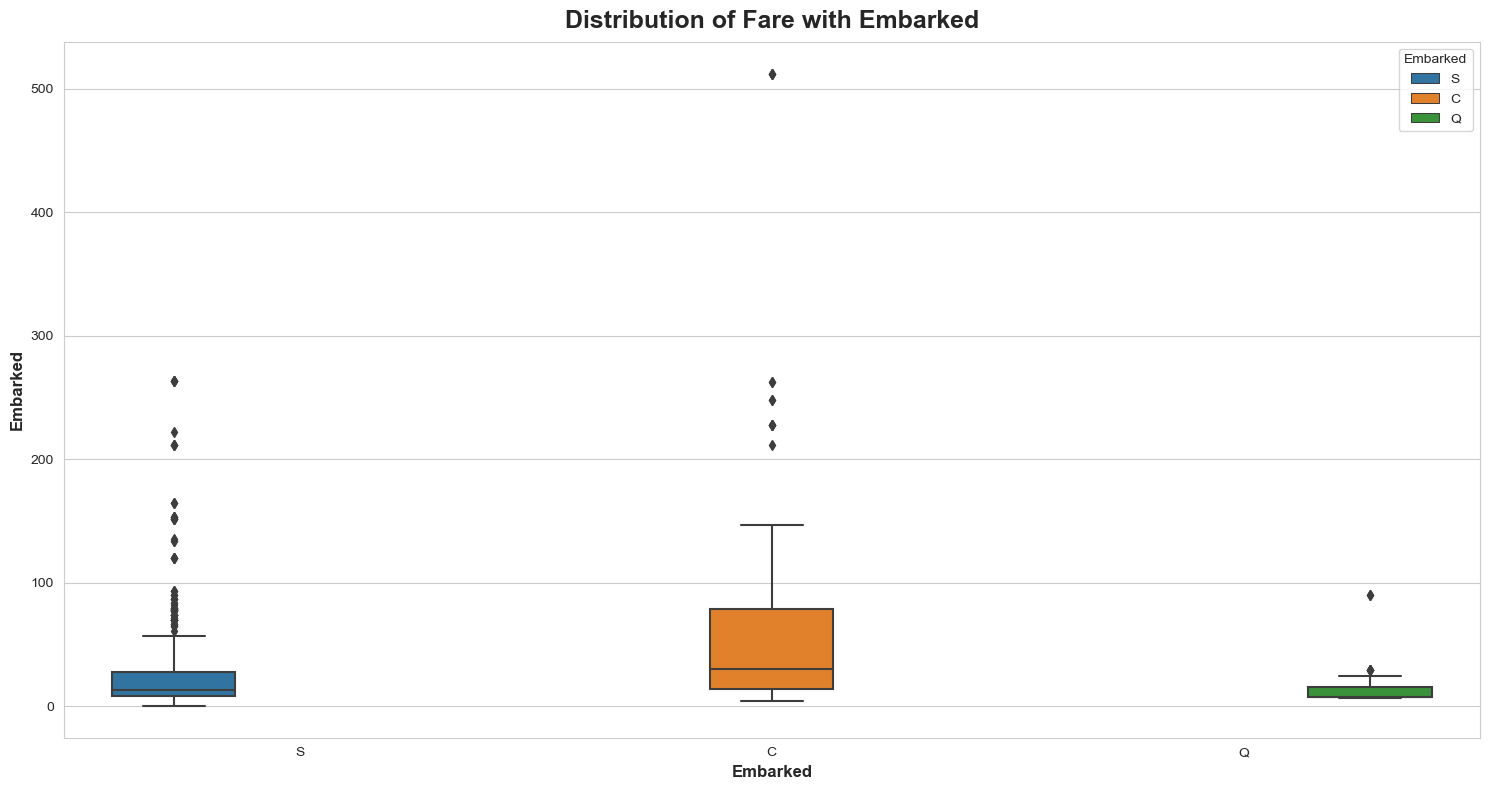

In [15]:
plt.figure(figsize=(15, 8))
sns.boxplot(x = 'Embarked' , y='Fare',data = df, hue = 'Embarked')
plt.ylabel("Embarked")
plt.title('Distribution of Fare with Embarked')
plt.show()

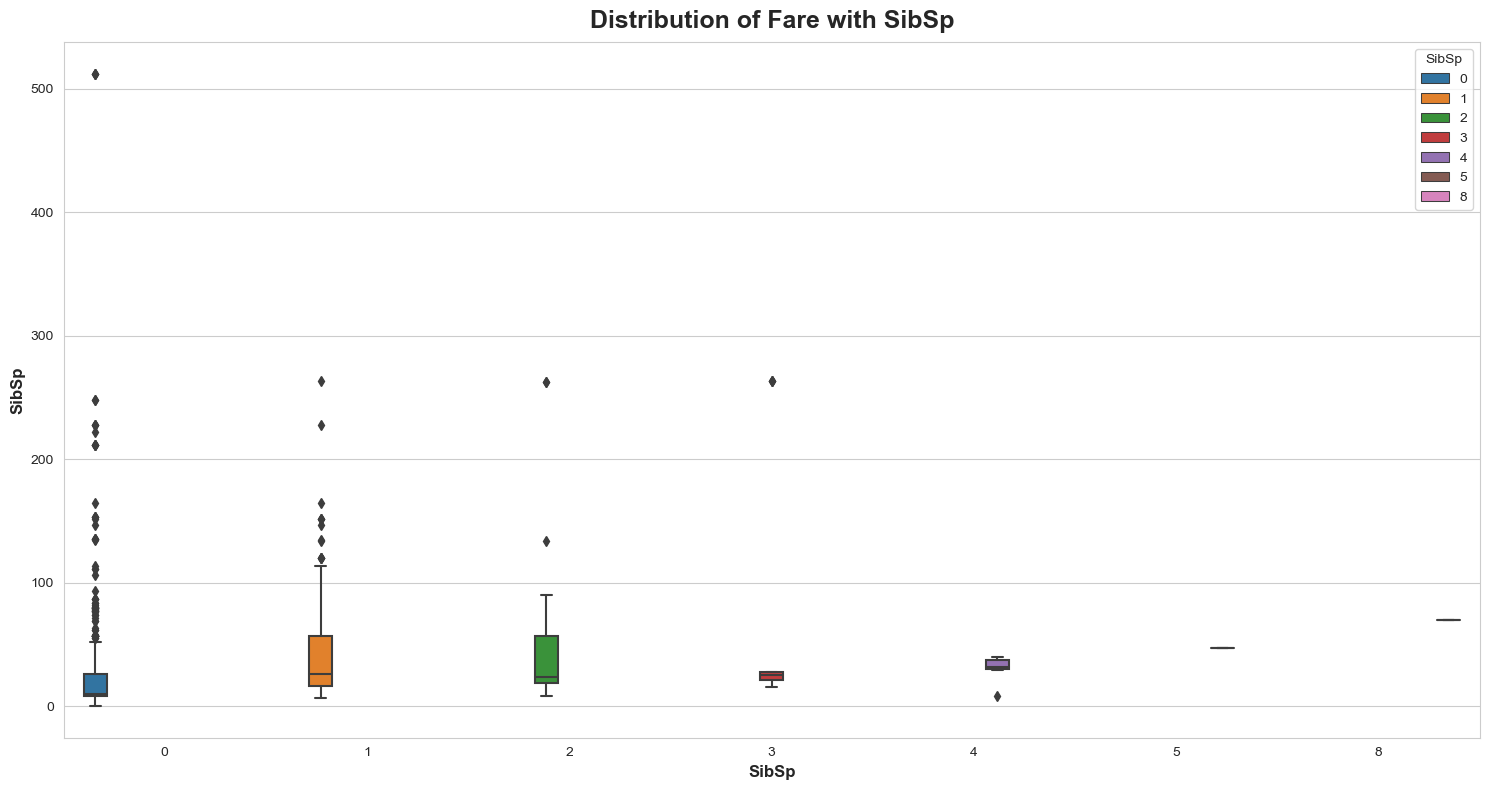

In [16]:
plt.figure(figsize=(15, 8))
sns.boxplot(x = 'SibSp' , y='Fare',data = df, hue = 'SibSp')
plt.ylabel("SibSp")
plt.title('Distribution of Fare with SibSp')
plt.show()

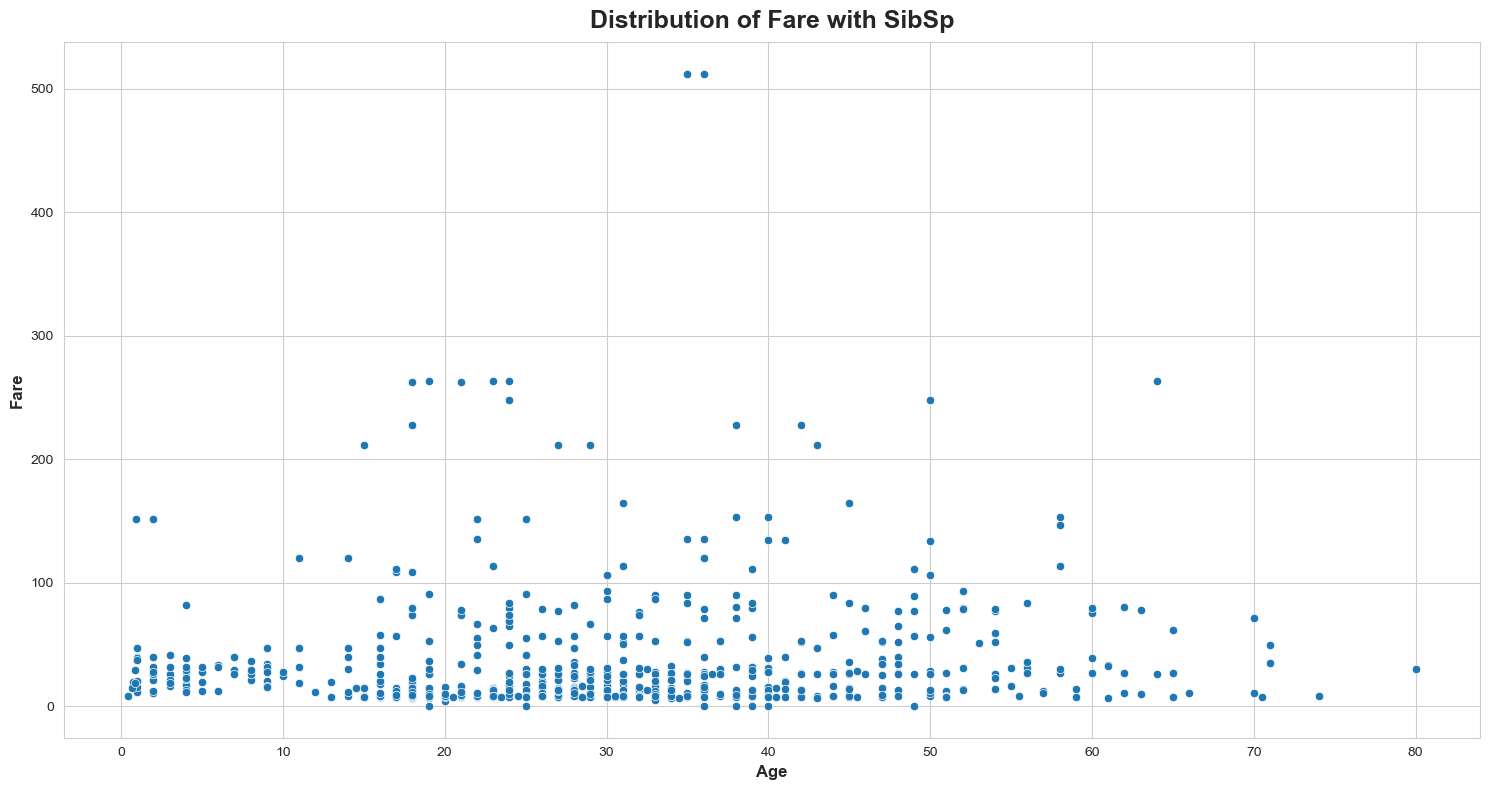

In [17]:
plt.figure(figsize=(15, 8))
sns.scatterplot(x = 'Age' , y='Fare',data = df)
plt.ylabel("Fare")
plt.title('Distribution of Fare with SibSp')
plt.show()

#### Here, wecannot se perfect relationship between age and fare.

## Checking for Linear Relationship with Fare

In [18]:
numeric_df = df.select_dtypes(include = ['number'])
corr_matrix = numeric_df.corr()

In [19]:
print(corr_matrix['Fare'].sort_values(ascending = False).to_string())

Fare           1.000000
Survived       0.257307
Parch          0.216225
SibSp          0.159651
Age            0.096067
PassengerId    0.012658
Pclass        -0.549500


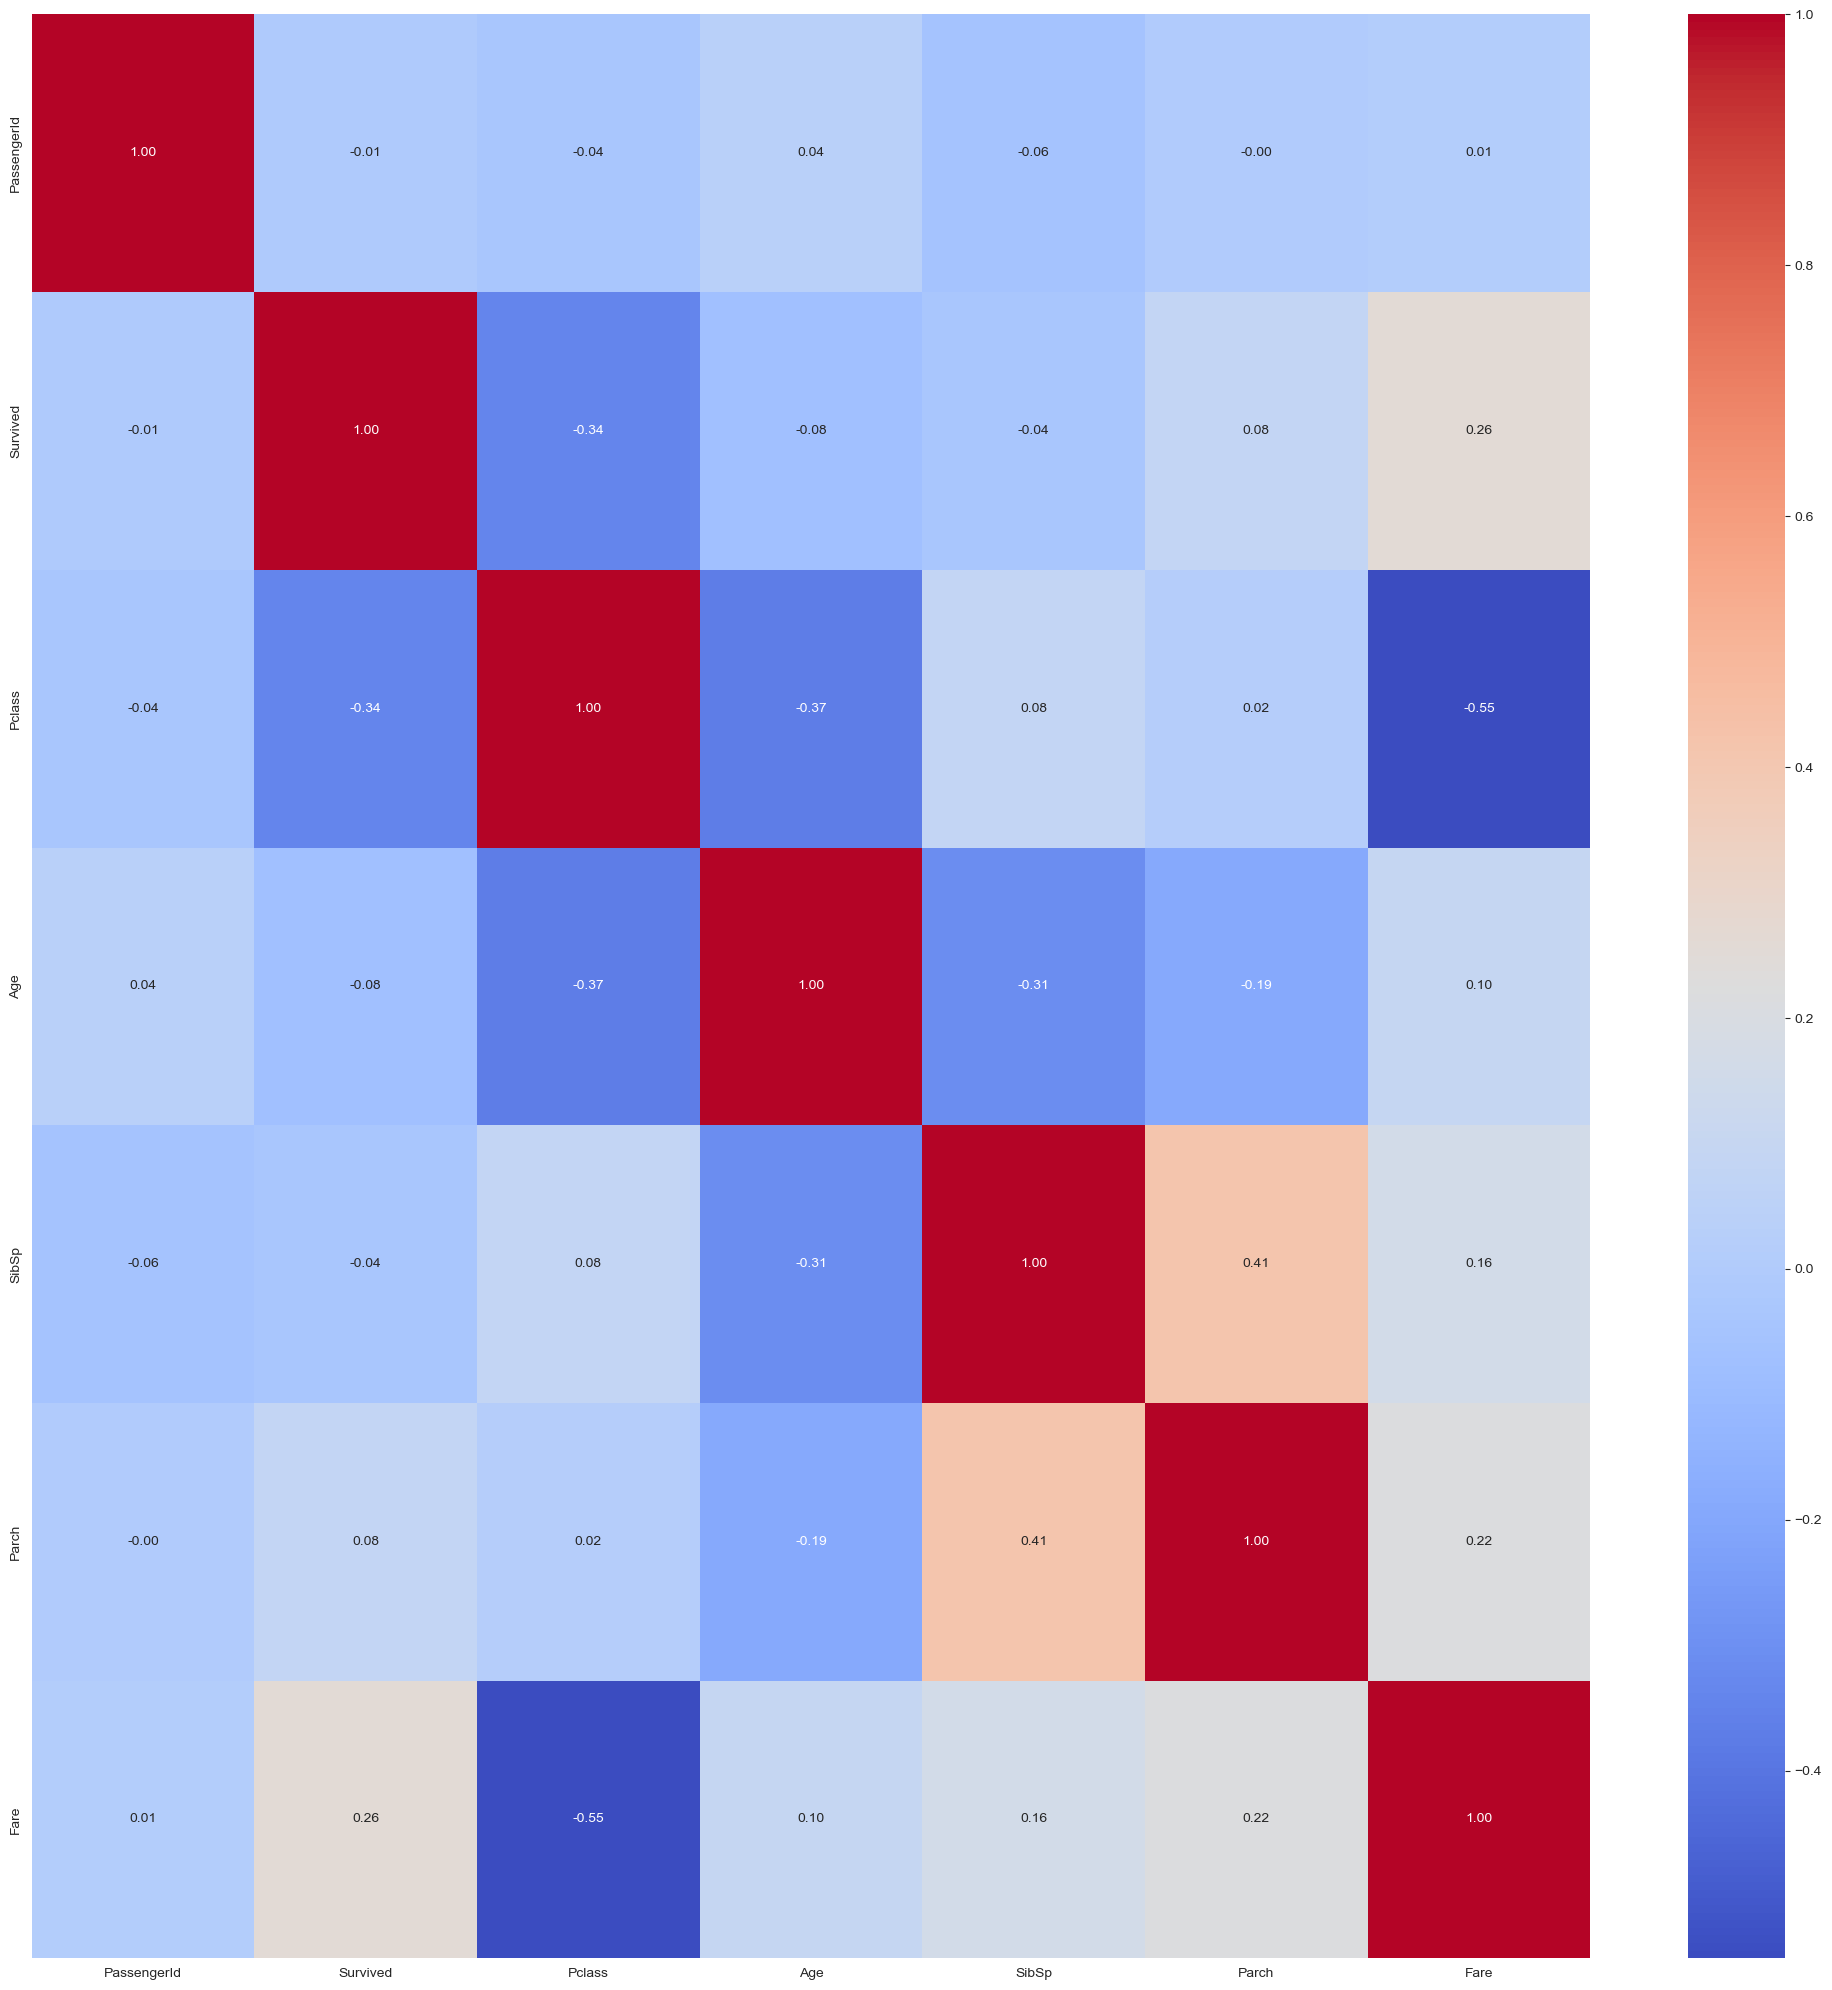

In [20]:
plt.figure(figsize=(20,20))
sns.heatmap(corr_matrix,annot=True,cmap = 'coolwarm', fmt = ".2f")
plt.show()

#### There is no perfect linear relationship with above variables, but there is nagative correlation between fare and pclass.

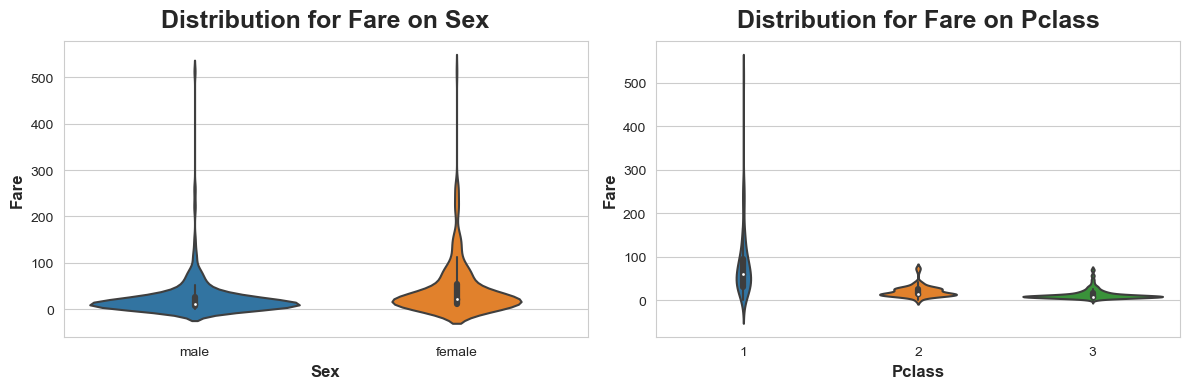

In [21]:
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
sns.violinplot(x="Sex", y ="Fare",data = df,)
plt.title("Distribution for Fare on Sex")
plt.xlabel("Sex")
plt.ylabel("Fare")

plt.subplot(1, 2, 2)
sns.violinplot(x="Pclass", y ="Fare",data = df)
plt.title("Distribution for Fare on Pclass")
plt.xlabel("Pclass")
plt.ylabel("Fare")
plt.tight_layout()
plt.show()

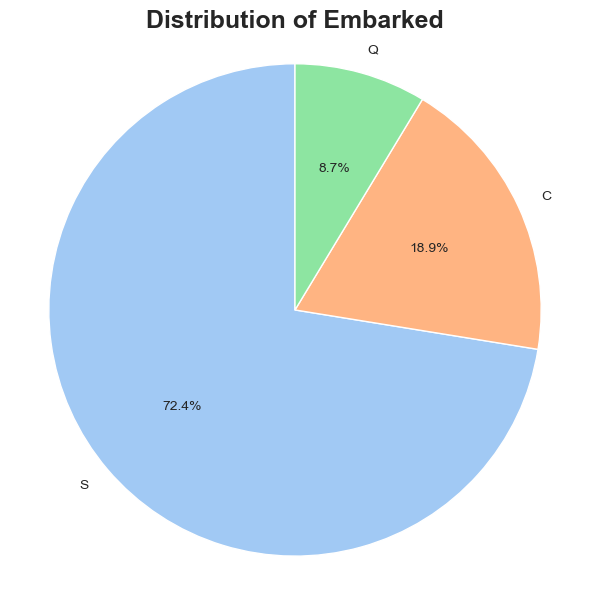

In [22]:
Embarked_counts = df['Embarked'].value_counts()

plt.figure(figsize=(6, 6))
plt.pie(Embarked_counts, labels=Embarked_counts.index, autopct='%1.1f%%', startangle=90, colors=sns.color_palette('pastel'))
plt.title('Distribution of Embarked')
plt.axis('equal')
plt.show()